In [1]:
library(tidyverse)
library(scales)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.2     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




# R Data Frames
The most popular data structure you will work with in R when working with tabular data is the ***data frame***. The ***data frame*** is an ***augmented list*** that is comprised of a list of ***atomic vectors*** that are of equal length. Below we read in the ***population_data*** data frame that will be the basis of the examples in this notebook.

In [2]:
population_data <- read_csv("../Datasets/population_rawdata.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  GEOID = col_double(),
  County = col_character(),
  State = col_character(),
  B02001_002E = col_double(),
  B02001_002M = col_double(),
  B02001_003E = col_double(),
  B02001_003M = col_double(),
  B02001_004E = col_double(),
  B02001_004M = col_double(),
  B02001_005E = col_double(),
  B02001_005M = col_double(),
  B02001_006E = col_double(),
  B02001_006M = col_double(),
  B02001_007E = col_double(),
  B02001_007M = col_double(),
  B02001_008E = col_double(),
  B02001_008M = col_double()
)




# Subsetting columns in a Dataframes

The ***population_data*** contains population data by age. The columns in the data set uses the variable names created by the demographers at the US census. The columns that ends with an "E" contains the population estimates and the columns that ends with and "M" contains the margin of errors. We only want the to keep the ***County***, ***State***, and columns that ends with "E". We can accomplish that task using the ***select()*** function from ***dplyr*** as listed below:

In [3]:
popdata_estimates <- 
  select(population_data, County, State, B02001_002E, 
         B02001_003E, B02001_004E, B02001_005E, B02001_006E, 
         B02001_007E, B02001_008E)
head(popdata_estimates)

County,State,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Corozal Municipio,Puerto Rico,28500,2097,0,0,0,2916,1420
Maunabo Municipio,Puerto Rico,3795,7042,10,0,0,317,133
Peñuelas Municipio,Puerto Rico,16967,755,29,35,0,3643,232
Ponce Municipio,Puerto Rico,117164,7493,211,148,0,9801,14046
San Sebastián Municipio,Puerto Rico,28075,996,0,97,0,9202,600
Toa Alta Municipio,Puerto Rico,57375,5412,291,296,6,4181,6608


The above method is the manual method and can be error prone when you are working with wide data frames with many columns. Below is an automatic method that performs the same task. Not only is the code less error prone but it is more succint as well.

In [4]:
popdata_estimates <- select(population_data, County, State, ends_with("E"))
head(popdata_estimates)

County,State,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Corozal Municipio,Puerto Rico,28500,2097,0,0,0,2916,1420
Maunabo Municipio,Puerto Rico,3795,7042,10,0,0,317,133
Peñuelas Municipio,Puerto Rico,16967,755,29,35,0,3643,232
Ponce Municipio,Puerto Rico,117164,7493,211,148,0,9801,14046
San Sebastián Municipio,Puerto Rico,28075,996,0,97,0,9202,600
Toa Alta Municipio,Puerto Rico,57375,5412,291,296,6,4181,6608


# Renaming columns

Renaming columns will be an common task you will have to do when working with data frames. You can use ***select()*** function to perform column renames but the downside will be that all columns in the data frame that are not specifically mentioned will be dropped. Another option is to use the ***rename()*** function. The ***rename()*** function renames the specified columns but does so while keeping the columns that were not explicitly referenced. An example is listed below:

In [5]:
popdata_rename <-
  rename(
       popdata_estimates, 
      `White` = B02001_002E,
      `Black` = B02001_003E,
      `American Indian` = B02001_004E,
      `Asian` = B02001_005E,
      `Pacific Islander` = B02001_006E,
      `Other Race` = B02001_007E,
      `Two or More Races` = B02001_008E
  )
head(popdata_rename)

County,State,White,Black,American Indian,Asian,Pacific Islander,Other Race,Two or More Races
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Corozal Municipio,Puerto Rico,28500,2097,0,0,0,2916,1420
Maunabo Municipio,Puerto Rico,3795,7042,10,0,0,317,133
Peñuelas Municipio,Puerto Rico,16967,755,29,35,0,3643,232
Ponce Municipio,Puerto Rico,117164,7493,211,148,0,9801,14046
San Sebastián Municipio,Puerto Rico,28075,996,0,97,0,9202,600
Toa Alta Municipio,Puerto Rico,57375,5412,291,296,6,4181,6608


# Creating calculated columns

One of the best features of R data frames is the ability to create calculated columns. The ***dplyr*** package makes it easy to develop calculated columns simple to complex mathematical expressions and logic. Below is an example of using a calculated column to sum up the population of all the races.

In [6]:
popdata_rowtotals <-
      mutate(popdata_rename, 
             All = White + Black + `American Indian` + Asian + 
                   `Pacific Islander` + `Other Race` + `Two or More Races`
      )
head(popdata_rowtotals)

County,State,White,Black,American Indian,Asian,Pacific Islander,Other Race,Two or More Races,All
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Corozal Municipio,Puerto Rico,28500,2097,0,0,0,2916,1420,34933
Maunabo Municipio,Puerto Rico,3795,7042,10,0,0,317,133,11297
Peñuelas Municipio,Puerto Rico,16967,755,29,35,0,3643,232,21661
Ponce Municipio,Puerto Rico,117164,7493,211,148,0,9801,14046,148863
San Sebastián Municipio,Puerto Rico,28075,996,0,97,0,9202,600,38970
Toa Alta Municipio,Puerto Rico,57375,5412,291,296,6,4181,6608,74169


A shorter and more succint method is to use the ***rowSums()*** method. The ***rowSums()*** method takes a data frame as an argument. You positioally subset the columns you want to sum using brackets. In this example we want to sum the values on the given row that are in the column in position 3 to the column in positon 9. We reference those columns using the following code:  `rowSums(popdata_rename[3:9]))`. The complete code snippet is listed below:

In [7]:
popdata_rowtotals <-
    mutate(popdata_rename, All = rowSums(popdata_rename[3:9]))
head(popdata_rowtotals)

County,State,White,Black,American Indian,Asian,Pacific Islander,Other Race,Two or More Races,All
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Corozal Municipio,Puerto Rico,28500,2097,0,0,0,2916,1420,34933
Maunabo Municipio,Puerto Rico,3795,7042,10,0,0,317,133,11297
Peñuelas Municipio,Puerto Rico,16967,755,29,35,0,3643,232,21661
Ponce Municipio,Puerto Rico,117164,7493,211,148,0,9801,14046,148863
San Sebastián Municipio,Puerto Rico,28075,996,0,97,0,9202,600,38970
Toa Alta Municipio,Puerto Rico,57375,5412,291,296,6,4181,6608,74169


A common calculation in data analysis is the ***percent of total***. Below is an example of calculating the ***percent of total*** by dividing the population of the race by the sum of the population of the other races:

In [8]:
popdata_percents <-
  mutate(popdata_rename, 
         `Percent White` = 
              White / 
              (White + Black + `American Indian` + Asian + 
               `Pacific Islander` + `Other Race` + `Two or More Races`),
         `Percent Black` = 
              Black / 
              (White + Black + `American Indian` + Asian + 
               `Pacific Islander` + `Other Race` + `Two or More Races`),
         `Percent American Indian` = 
              `American Indian` / 
              (White + Black + `American Indian` + Asian + 
               `Pacific Islander` + `Other Race` + `Two or More Races`),
         `Percent Asian` = 
              Asian / 
              (White + Black + `American Indian` + Asian + 
               `Pacific Islander` + `Other Race` + `Two or More Races`),
         `Percent Pacific Islander` = 
              `Pacific Islander` / 
              (White + Black + `American Indian` + Asian + 
               `Pacific Islander` + `Other Race` + `Two or More Races`),
         `Percent Other Race` = 
              `Other Race` / 
              (White + Black + `American Indian` + Asian + 
               `Pacific Islander` + `Other Race` + `Two or More Races`),
         `Percent Two or More Races` = 
              `Two or More Races` / 
              (White + Black + `American Indian` + Asian + 
               `Pacific Islander` + `Other Race` + `Two or More Races`)
  )
head(popdata_percents)

County,State,White,Black,American Indian,Asian,Pacific Islander,Other Race,Two or More Races,Percent White,Percent Black,Percent American Indian,Percent Asian,Percent Pacific Islander,Percent Other Race,Percent Two or More Races
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Corozal Municipio,Puerto Rico,28500,2097,0,0,0,2916,1420,0.8158475,0.06002920,0.0000000000,0.0000000000,0.000000e+00,0.08347408,0.04064924
Maunabo Municipio,Puerto Rico,3795,7042,10,0,0,317,133,0.3359299,0.62335133,0.0008851908,0.0000000000,0.000000e+00,0.02806055,0.01177304
Peñuelas Municipio,Puerto Rico,16967,755,29,35,0,3643,232,0.7832972,0.03485527,0.0013388117,0.0016158072,0.000000e+00,0.16818245,0.01071049
Ponce Municipio,Puerto Rico,117164,7493,211,148,0,9801,14046,0.7870592,0.05033487,0.0014174106,0.0009942027,0.000000e+00,0.06583906,0.09435521
San Sebastián Municipio,Puerto Rico,28075,996,0,97,0,9202,600,0.7204260,0.02555812,0.0000000000,0.0024890942,0.000000e+00,0.23613036,0.01539646
Toa Alta Municipio,Puerto Rico,57375,5412,291,296,6,4181,6608,0.7735712,0.07296849,0.0039234721,0.0039908857,8.089633e-05,0.05637126,0.08909383


The above method is the long method and requires a lot of typing which means it is error prone. A more succinct and less error prone way would be to use the ***rowSums()*** function we learned earlier to calculate the denominator which is illustrated below:

In [9]:
popdata_percents <-
  mutate(popdata_rename, 
         `Percent White` = 
              White / 
              rowSums(popdata_rename[3:9]),
         `Percent Black` = 
               Black / 
               rowSums(popdata_rename[3:9]),
         `Percent American Indian` = 
               `American Indian` / 
               rowSums(popdata_rename[3:9]),
         `Percent Asian` = 
                Asian / 
                rowSums(popdata_rename[3:9]),
         `Percent Pacific Islander` = 
                `Pacific Islander` / 
                rowSums(popdata_rename[3:9]),
         `Percent Other Race` = 
                `Other Race` / 
                rowSums(popdata_rename[3:9]),
         `Percent Two or More Races` = 
                `Two or More Races` / rowSums(popdata_rename[3:9])
  )
head(popdata_percents)

County,State,White,Black,American Indian,Asian,Pacific Islander,Other Race,Two or More Races,Percent White,Percent Black,Percent American Indian,Percent Asian,Percent Pacific Islander,Percent Other Race,Percent Two or More Races
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Corozal Municipio,Puerto Rico,28500,2097,0,0,0,2916,1420,0.8158475,0.06002920,0.0000000000,0.0000000000,0.000000e+00,0.08347408,0.04064924
Maunabo Municipio,Puerto Rico,3795,7042,10,0,0,317,133,0.3359299,0.62335133,0.0008851908,0.0000000000,0.000000e+00,0.02806055,0.01177304
Peñuelas Municipio,Puerto Rico,16967,755,29,35,0,3643,232,0.7832972,0.03485527,0.0013388117,0.0016158072,0.000000e+00,0.16818245,0.01071049
Ponce Municipio,Puerto Rico,117164,7493,211,148,0,9801,14046,0.7870592,0.05033487,0.0014174106,0.0009942027,0.000000e+00,0.06583906,0.09435521
San Sebastián Municipio,Puerto Rico,28075,996,0,97,0,9202,600,0.7204260,0.02555812,0.0000000000,0.0024890942,0.000000e+00,0.23613036,0.01539646
Toa Alta Municipio,Puerto Rico,57375,5412,291,296,6,4181,6608,0.7735712,0.07296849,0.0039234721,0.0039908857,8.089633e-05,0.05637126,0.08909383


The above method works great at performing the calculation but the values are not formatted. This makes the values hard to read. You can easily format the values using special formatting functions available in R. Below we are using the ***percent()*** function from the ***scales*** package to format the values as a percent.

In [10]:
popdata_percents_transumte <-
  transmute(popdata_rename,
            County,
            State,
            `Percent White` = 
                 percent(White / rowSums(popdata_rename[3:9])),
            `Percent Black` = 
                 percent(Black / rowSums(popdata_rename[3:9])),
            `Percent American Indian` = 
                 percent(`American Indian` / rowSums(popdata_rename[3:9])),
            `Percent Asian` = 
                 percent(Asian / rowSums(popdata_rename[3:9])),
            `Percent Pacific Islander` = 
                 percent(`Pacific Islander` / rowSums(popdata_rename[3:9])),
            `Percent Other Race` = 
                 percent(`Other Race` / rowSums(popdata_rename[3:9])),
            `Percent Two or More Races` = 
                 percent(`Two or More Races` / rowSums(popdata_rename[3:9]))
  )
head(popdata_percents_transumte)

County,State,Percent White,Percent Black,Percent American Indian,Percent Asian,Percent Pacific Islander,Percent Other Race,Percent Two or More Races
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Corozal Municipio,Puerto Rico,81.5847479%,6.0029199%,0.000000000%,0.00000000%,0.000000000%,8.34740790%,4.06492428%
Maunabo Municipio,Puerto Rico,33.5929893%,62.3351332%,0.088519076%,0.00000000%,0.000000000%,2.80605470%,1.17730371%
Peñuelas Municipio,Puerto Rico,78.3297170%,3.4855270%,0.133881169%,0.16158072%,0.000000000%,16.81824477%,1.07104935%
Ponce Municipio,Puerto Rico,78.7059242%,5.0334872%,0.141741064%,0.09942027%,0.000000000%,6.58390601%,9.43552125%
San Sebastián Municipio,Puerto Rico,72.0425969%,2.5558122%,0.000000000%,0.24890942%,0.000000000%,23.61303567%,1.53964588%
Toa Alta Municipio,Puerto Rico,77.3571169%,7.2968491%,0.392347207%,0.39908857%,0.008089633%,5.63712602%,8.90938263%


You are not limited to select a range of columns as we have previously done when summing multiple columns in a calculated column using the ***rowSums()*** function. You can positional select the columns as well using the ***c()*** function. Below the ***c()*** function is used to positionally select the columns that neeeds be added. The column subsetting is done inside the bracket in the following code:  `rowSums(popdata_rename[,c(3,4)])`.  The `c(3,4)` is a way of telling R that we want to sum the values in the columns that are in position 3 and 4 in the given row in the ***popdata_rename*** data frame.

In [11]:
popdata_bw <-
  transmute(popdata_rename, 
         County,
         State,
         White,
         Black,
         #`Black and White` = rowSums(popdata_rename[,c(3,4)])
         `Black and White` = rowSums(popdata_rename[c(3,4)])
  )
head(popdata_bw)

County,State,White,Black,Black and White
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Corozal Municipio,Puerto Rico,28500,2097,30597
Maunabo Municipio,Puerto Rico,3795,7042,10837
Peñuelas Municipio,Puerto Rico,16967,755,17722
Ponce Municipio,Puerto Rico,117164,7493,124657
San Sebastián Municipio,Puerto Rico,28075,996,29071
Toa Alta Municipio,Puerto Rico,57375,5412,62787


You can also do the same task using the column name instead of the column position as illustrated below:

In [12]:
popdata_bw <-
  transmute(popdata_rename, 
         County,
         State,
         White,
         Black,
         `Black and White` = rowSums(popdata_rename[,c("White","Black")])
  )
head(popdata_bw)

County,State,White,Black,Black and White
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Corozal Municipio,Puerto Rico,28500,2097,30597
Maunabo Municipio,Puerto Rico,3795,7042,10837
Peñuelas Municipio,Puerto Rico,16967,755,17722
Ponce Municipio,Puerto Rico,117164,7493,124657
San Sebastián Municipio,Puerto Rico,28075,996,29071
Toa Alta Municipio,Puerto Rico,57375,5412,62787


# Aggregating and pivoting data

The data in the ***popdata_rename*** data frame contains population data at the county data. The ***dplyr*** offers functionality that makes it relatively easy to aggregate data at the desired level. Below, we are aggregating the data up one level to the **state** level. 

This is done in multiple steps that are chained together using the ***pipe operator (%>%)*** that is made available from the ***dplyr*** load. This operator enables you to take the results of the expression that precedes the ***pipe operator*** and pass it to the expression in the succeeding operator as the first argument. So, in the code below The following steps are performed:

1. A chain operation is started based on the ***popdata_rename*** data frame using the pipe operator. The ***popdata_rename*** data frame is passed to the first argument of the ***group_by()*** function.
2. The ***State*** column you want to group by is specified in the ***group_by()*** function. You can specify more than one column by delimiting the columns you want to use with a comma. You pass the results of this step to the ***sumarize()*** function in the next step via the pipe operator
3. You create calculated columns that holds the aggregated values based on your groupings. The aggregated values in this example are summations. 

*Note the use of the na.rm in the sum function. That function is important because NA values can have unexpected side effects. One NA value will cause result to be NA. You can mitigate this behavior if it is not desired by setting the na.rm argument to TRUE.*

In [13]:
popdata_group <-
    popdata_rename %>%
    group_by(State) %>%
    summarize(
        White = sum(White, na.rm=TRUE), 
        Black = sum(Black, na.rm=TRUE), 
        `American Indian`= sum(`American Indian`, na.rm=TRUE), 
        Asian = sum(Asian, na.rm=TRUE), 
        `Pacific Islander`= sum(`Pacific Islander`, na.rm=TRUE), 
        `Other Race` = sum(`Other Race`, na.rm=TRUE), 
        `Two or More Races` = sum(`Two or More Races`, na.rm=TRUE),
        `Number of Counties`=n(),
        .groups = 'drop'
    )
head(popdata_group)

State,White,Black,American Indian,Asian,Pacific Islander,Other Race,Two or More Races,Number of Counties
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Alabama,3317702,1287167,25098,62815,2213,66942,88834,67
Alaska,481971,23702,104995,45604,9075,10505,62713,29
Arizona,5277661,292831,300182,213417,13364,474583,237908,15
Arkansas,2302141,459969,19476,42368,7062,75106,71822,75
California,23607242,2263222,292018,5503672,152027,5329952,1834714,58
Colorado,4576201,221155,51406,164771,8580,225497,188909,64


You can perform the above task using a more succinct and less error prone method via the ***summarize_if()*** function. Here are the arguments of the function:

1. The first argument is a data frame. The data frame from the previous ***group_by()*** step was implicitly passed to the ***summarize_if()*** function because a ***pipe operator*** was used. 
2. The next argument is a predicate function that is used test the condition you want to test. In this case we are testing to  see if the data type of the given column is numeric because only numeric columns will be acted upon.
3. The next argument is the aggregate function you want to use which in this case is the ***sum()*** function. 
4. The last argument is for optional arguments. We use the na.rm optional argument and set it to **TRUE**. Remember that it is important to ensure that NA values will not influence your totals.

Running the code below will give you the same results as the previous code snippet even though much less code was used.

In [14]:
popdata_group <-
  popdata_rename %>%
  group_by(State) %>%
  summarize_if(is.numeric, sum, na.rm = TRUE)
head(popdata_group)

State,White,Black,American Indian,Asian,Pacific Islander,Other Race,Two or More Races
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,3317702,1287167,25098,62815,2213,66942,88834
Alaska,481971,23702,104995,45604,9075,10505,62713
Arizona,5277661,292831,300182,213417,13364,474583,237908
Arkansas,2302141,459969,19476,42368,7062,75106,71822
California,23607242,2263222,292018,5503672,152027,5329952,1834714
Colorado,4576201,221155,51406,164771,8580,225497,188909


An important concept in data analysis is the concept of having your data in a format know as a ***tidy*** format. This means that your data frame is structured in such a way that each column in your data frame represents a variable and each row in you data frame represents a single observation. Having your data in this format makes performing data analysis, in most cases, much easier. A thorough coverage of this topic can be found at this URL:  https://vita.had.co.nz/papers/tidy-data.pdf. 

The ***popdata_group*** is not in a ***tidy format*** because each race has its own column which breaks the rule. We can put the data in a ***tidy format*** using the code below:

In [15]:
popdata_unpivot <-
  popdata_group %>%
  pivot_longer(
      !State,
      names_to = "Race",
      values_to = "Population"
  )
head(popdata_unpivot)

State,Race,Population
<chr>,<chr>,<dbl>
Alabama,White,3317702
Alabama,Black,1287167
Alabama,American Indian,25098
Alabama,Asian,62815
Alabama,Pacific Islander,2213
Alabama,Other Race,66942


The code uses the the ***pivot_longer()*** function to unpivot the races into one column. It is done by first specifying the columns you want to unpivot. In this example we want to unpivot the column that represent the races which is all the columns except for the ***State*** column. We make that selection by negating the ***State*** column with the "!" which tells ***tidyr*** to select all columns instead of the ***State*** column. Next, we give a name to the column that will hold the races. In this example, we name that column ***Race***. Lastly, we name the column that will hold the value of the population for each state and race combination. The name we gave that column was ***Population***.



# Performing data wrangling and data visualization in the same workflow

We just performed several examples that showed how the ***pipe operator (%>%)*** can be used to chain together data wrangling steps. You can also use the ***pipe operator (%>%)*** to chain together both data wrangling tasks and a data visualization tasks in one work-flow. Below, we are filtering the data frame created in the previous step to only include records from the state of Michigan then creating a horizontal bar chart ranking the races by population count. The data wrangling methods and data visualization methods were covered earlier in the workshop. Below, we were able to combine both in one workflow using the ***pipe operator***.

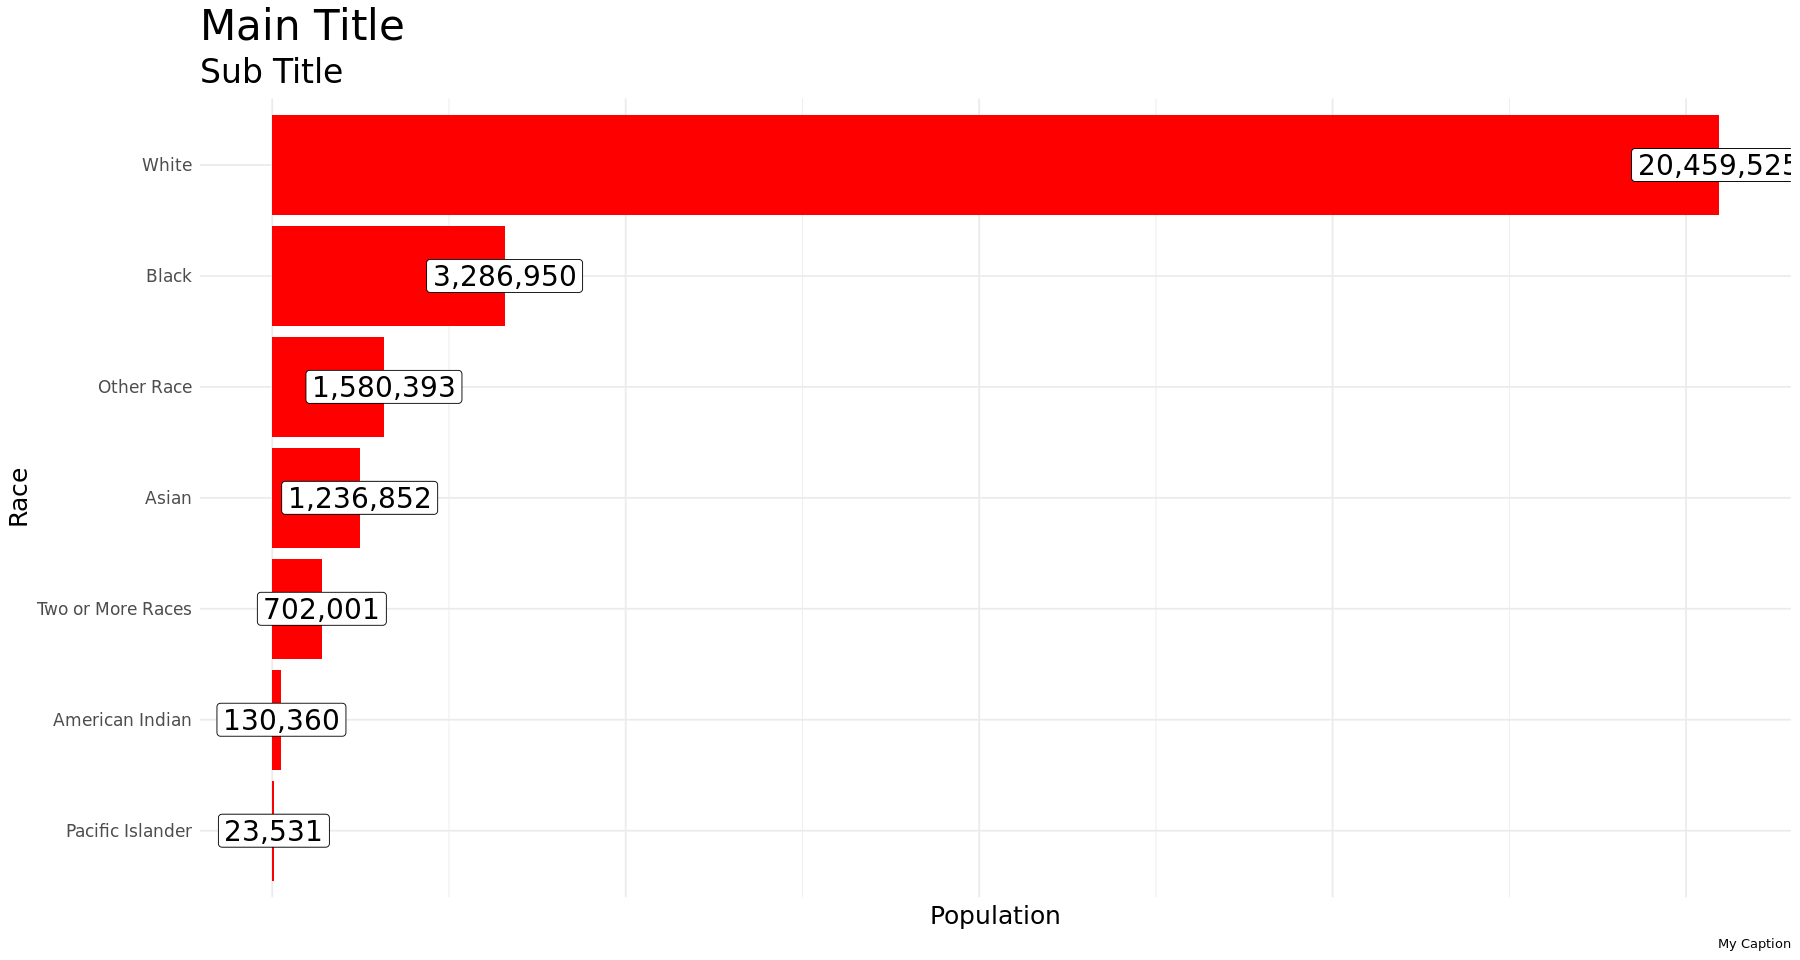

In [16]:
options(repr.plot.width=15, repr.plot.height=8)
plot <-
    popdata_unpivot %>%
    filter(State == "Texas") %>%
    transmute(Race=fct_reorder(Race, Population), Population) %>%
    ggplot(aes(x=Race, y=Population, label=comma(Population))) +
        geom_bar(stat="Identity", fill="red") + 
        geom_label(size=6) +
        coord_flip() +
        scale_y_continuous(labels=NULL) +
        theme_minimal() +
        labs(
              title = "Main Title"
             ,subtitle = "Sub Title"
             ,caption = "My Caption"
        ) + 
    theme(axis.text = element_text(size=10),
          axis.title = element_text(size=15),
          plot.title = element_text(size=25),
          plot.subtitle = element_text(size=20),
          plot.caption = element_text(size=8))
        
plot